# MOST STREAMED SPOTIFY SONGS FOR THE YEAR 2023

## Assignment 1: Exploratory Data Analysis

### Juanito M. Ramos II - BS Computer Engineering

#### _Importing Necessary Libraries_

In [4]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

#### _Preparing the dataset_

In [5]:
file_path = "C:/Users/Juanito/OneDrive/Desktop/Python Projects/Machine Learning/Datasets/Spotify Songs Dataset/spotify-2023.csv"

# Read a small chunk to guess encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(100000))  # read first 100 KB

print(result)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [6]:
spotify_df = pd.read_csv(file_path, encoding='Windows-1252')


### 1. Overview of Dataset

In [7]:
print(spotify_df.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [24]:
# Show columns info: names, non-null count, data types
print("=== Dataset Columns Info ===")
columns_info = pd.DataFrame({
    'Column Name': spotify_df.columns,
    'Non-Null Count': spotify_df.notnull().sum().values,
    'Data Type': spotify_df.dtypes.values
})
print(tabulate(columns_info, headers='keys', tablefmt='pretty', showindex=False))

# Show first 5 rows as sample data
print("\n=== Sample Data (First 5 Rows) ===")
print(tabulate(spotify_df.head(), headers='keys', tablefmt='pretty', showindex=False))

# Show basic descriptive stats for numeric columns
print("\n=== Descriptive Statistics (Numeric Columns) ===")
print(tabulate(spotify_df.describe().T, headers='keys', tablefmt='pretty', floatfmt=".2f"))


=== Dataset Columns Info ===
+----------------------+----------------+-----------+
|     Column Name      | Non-Null Count | Data Type |
+----------------------+----------------+-----------+
|      track_name      |      952       |  object   |
|    artist(s)_name    |      952       |  object   |
|     artist_count     |      952       |   int64   |
|    released_year     |      952       |   int64   |
|    released_month    |      952       |   int64   |
|     released_day     |      952       |   int64   |
| in_spotify_playlists |      952       |   int64   |
|  in_spotify_charts   |      952       |   int64   |
|       streams        |      952       |  float64  |
|  in_apple_playlists  |      952       |   int64   |
|   in_apple_charts    |      952       |   int64   |
| in_deezer_playlists  |      952       |  object   |
|   in_deezer_charts   |      952       |   int64   |
|   in_shazam_charts   |      952       |  object   |
|         bpm          |      952       |   int64   |

##### How many rows and columns does the dataset contain?

In [8]:
num_rows = spotify_df.shape[0]
num_cols = spotify_df.shape[1]

print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")

Number of rows: 953, Number of columns: 24


##### What are the data types of each column? Are there any missing values?

In [9]:
data_types = spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [10]:
data_summary = pd.DataFrame({
    "Data Type": spotify_df.dtypes,
    "Missing Values": spotify_df.isnull().sum(),
    "Non-Missing Values": spotify_df.notnull().sum()
})
data_summary

,Data Type,Missing Values,Non-Missing Values
track_name,object,0,953
artist(s)_name,object,0,953
artist_count,int64,0,953
released_year,int64,0,953
released_month,int64,0,953
released_day,int64,0,953
in_spotify_playlists,int64,0,953
in_spotify_charts,int64,0,953
streams,object,0,953
in_apple_playlists,int64,0,953


### 2. Basic Descriptive Statistics

##### What are the mean, median, and standard deviation of the streams column?

In [11]:
spotify_df = spotify_df[spotify_df['streams'].str.replace(',', '').str.isnumeric()]

In [12]:
# Finding rows where streams is not purely digits or commas
invalid_streams = spotify_df[~spotify_df['streams'].astype(str).str.replace(',', '').str.isdigit()]

invalid_streams[['track_name', 'streams']].head(10)

,track_name,streams


In [13]:
# Convert the 'streams' column to numeric, removing comma
spotify_df['streams'] = spotify_df['streams'].replace({',': ''}, regex=True).astype(float)

# Get the mean, median, and standard deviation of the 'streams' column
descriptive_stats = spotify_df.describe(include=[float, int]).T[['mean', '50%', 'std']]

# Fix the format with two decimal places only
descriptive_stats = descriptive_stats.applymap(lambda x: f"{x:.2f}")

descriptive_stats

C:\Users\Juanito\AppData\Local\Temp\ipykernel_15684\2337624749.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  descriptive_stats = descriptive_stats.applymap(lambda x: f"{x:.2f}")


,mean,50%,std
artist_count,1.56,1.00,0.89
released_year,2018.29,2022.00,11.01
released_month,6.04,6.00,3.56
released_day,13.94,13.00,9.20
in_spotify_playlists,5202.57,2216.50,7901.40
in_spotify_charts,12.02,3.00,19.58
streams,514137424.94,290530915.00,566856949.04
in_apple_playlists,67.87,34.00,86.47
in_apple_charts,51.96,38.50,50.63
in_deezer_charts,2.67,0.00,6.04


##### What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

In [14]:
distribution_stats = spotify_df[['released_year', 'artist_count']].describe()
distribution_stats = distribution_stats.applymap(lambda x: f"{x:.2f}")

distribution_stats

C:\Users\Juanito\AppData\Local\Temp\ipykernel_15684\573778576.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_stats = distribution_stats.applymap(lambda x: f"{x:.2f}")


,released_year,artist_count
count,952.00,952.00
mean,2018.29,1.56
std,11.01,0.89
min,1930.00,1.00
25%,2020.00,1.00
50%,2022.00,1.00
75%,2022.00,2.00
max,2023.00,8.00


In [15]:
spotify_df = spotify_df.fillna('')

In [16]:
yearly_artist_stats = spotify_df.groupby('released_year')['artist_count'].agg(
    mean='mean',
    song_count='count',
    min='min',
    max='max'
).reset_index()

yearly_artist_stats['released_year'] = yearly_artist_stats['released_year'].astype(int)

for col in ['mean', 'song_count', 'min', 'max']:
    yearly_artist_stats[col] = yearly_artist_stats[col].apply(
        lambda x: f"{x:.2f}" if pd.notnull(x) else '0.00'
    )

yearly_artist_stats


,released_year,mean,song_count,min,max
0,1930,3.00,1.00,3.00,3.00
1,1942,3.00,1.00,3.00,3.00
2,1946,1.00,1.00,1.00,1.00
3,1950,2.00,1.00,2.00,2.00
4,1952,1.00,1.00,1.00,1.00
5,1957,1.00,2.00,1.00,1.00
6,1958,1.67,3.00,1.00,3.00
7,1959,1.00,2.00,1.00,1.00
8,1963,1.00,3.00,1.00,1.00
9,1968,1.00,1.00,1.00,1.00


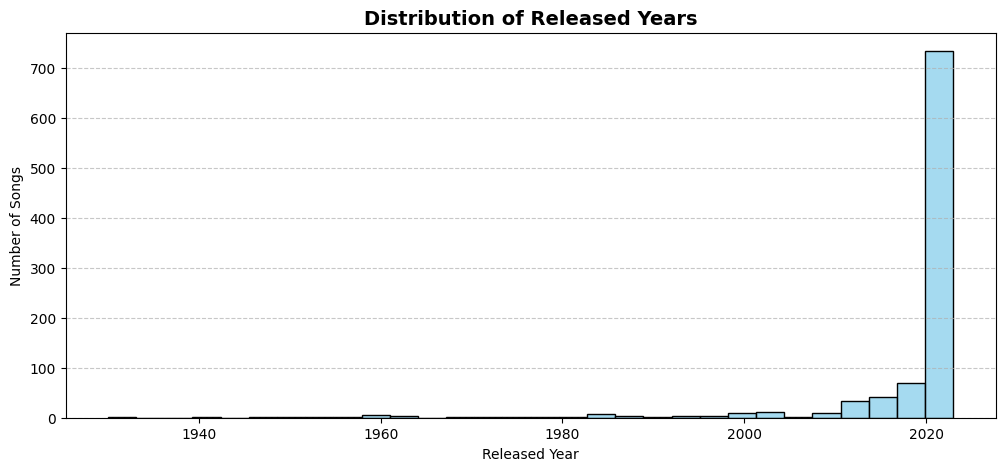

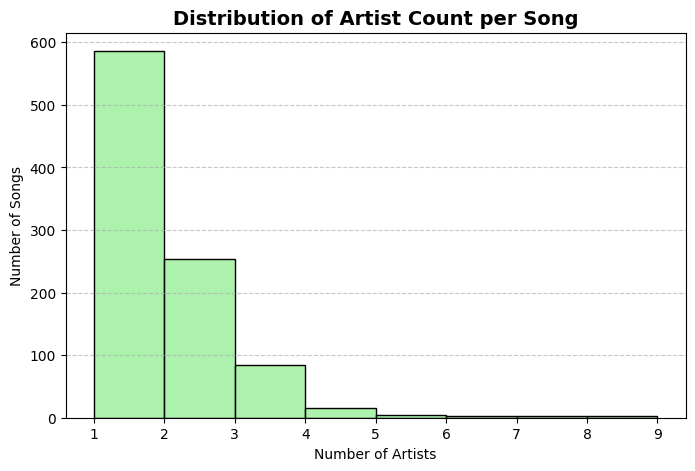

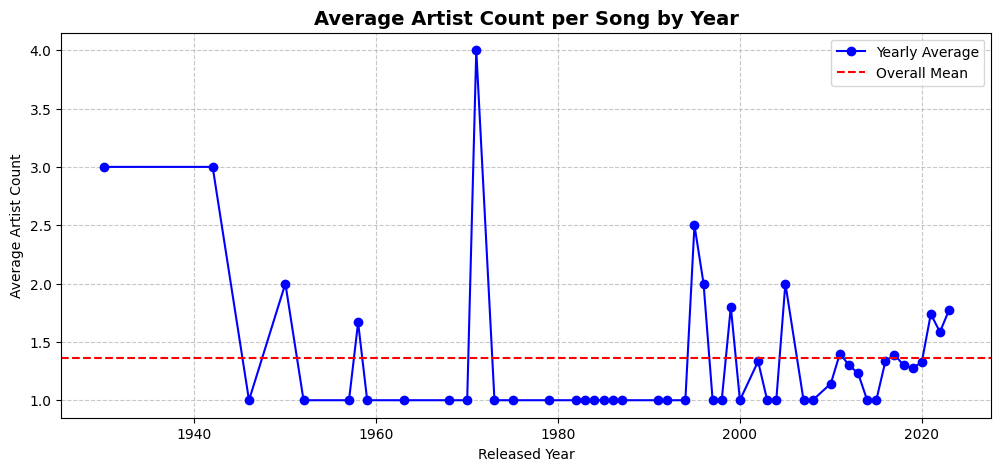

Artist Count Summary Statistics:
count    952.000000
mean       1.556723
std        0.893331
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64

Released Year Summary Statistics:
count     952.000000
mean     2018.288866
std        11.011397
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Distribution of released_year ---
plt.figure(figsize=(12, 5))
sns.histplot(spotify_df['released_year'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Released Years', fontsize=14, fontweight='bold')
plt.xlabel('Released Year')
plt.ylabel('Number of Songs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Distribution of artist_count ---
plt.figure(figsize=(8, 5))
sns.histplot(spotify_df['artist_count'], bins=range(1, spotify_df['artist_count'].max() + 2), 
             kde=False, color='lightgreen', edgecolor='black')
plt.title('Distribution of Artist Count per Song', fontsize=14, fontweight='bold')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Songs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Trends Over Time ---
yearly_artist_stats = spotify_df.groupby('released_year')['artist_count'].agg(mean='mean', count='count').reset_index()

plt.figure(figsize=(12, 5))
plt.plot(yearly_artist_stats['released_year'], yearly_artist_stats['mean'], 
         marker='o', color='blue', label='Yearly Average')
plt.axhline(y=yearly_artist_stats['mean'].mean(), color='red', linestyle='--', label='Overall Mean')
plt.title('Average Artist Count per Song by Year', fontsize=14, fontweight='bold')
plt.xlabel('Released Year')
plt.ylabel('Average Artist Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# --- Quick stats to detect outliers ---
artist_count_desc = spotify_df['artist_count'].describe()
year_count_desc = spotify_df['released_year'].describe()

print("Artist Count Summary Statistics:")
print(artist_count_desc)
print("\nReleased Year Summary Statistics:")
print(year_count_desc)


### 3. Top Performers

#### Which track has the highest number of streams? Display the top 5 most streamed tracks.

In [31]:
from tabulate import tabulate

top_5_highest_streams = spotify_df.nlargest(5, 'streams')[['track_name', 'artist(s)_name', 'streams']]
top_5_highest_streams['streams'] = top_5_highest_streams['streams'].apply(lambda x: f"{x:,.0f}")

print("Top 5 Most Streamed Tracks:")
print(tabulate(top_5_highest_streams, headers='keys', tablefmt='pretty', showindex=False))

Top 5 Most Streamed Tracks:
+-----------------------------------------------+-----------------------+---------------+
|                  track_name                   |    artist(s)_name     |    streams    |
+-----------------------------------------------+-----------------------+---------------+
|                Blinding Lights                |      The Weeknd       | 3,703,895,074 |
|                 Shape of You                  |      Ed Sheeran       | 3,562,543,890 |
|               Someone You Loved               |     Lewis Capaldi     | 2,887,241,814 |
|                 Dance Monkey                  |      Tones and I      | 2,864,791,672 |
| Sunflower - Spider-Man: Into the Spider-Verse | Post Malone, Swae Lee | 2,808,096,550 |
+-----------------------------------------------+-----------------------+---------------+


### Who are the top 5 most frequent artists based on the number of tracks in the dataset?

Top 5 Most Frequent Artists by Number of Tracks:
  artist(s)_name  track_count
0   Taylor Swift           34
1     The Weeknd           22
2      Bad Bunny           19
3            SZA           19
4   Harry Styles           17


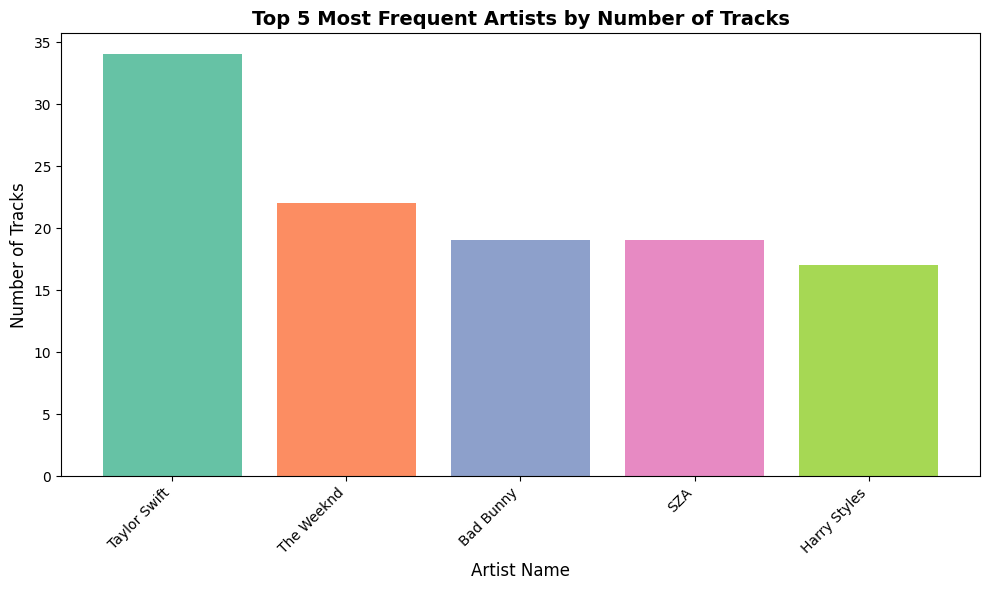

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5_most_frequent_artists = spotify_df['artist(s)_name'].value_counts().head(5).reset_index()
top_5_most_frequent_artists.columns = ['artist(s)_name', 'track_count']

print("Top 5 Most Frequent Artists by Number of Tracks:")
print(top_5_most_frequent_artists)

# Use a color palette from seaborn (e.g., "Set2")
colors = sns.color_palette("Set2", len(top_5_most_frequent_artists))

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_5_most_frequent_artists['artist(s)_name'], top_5_most_frequent_artists['track_count'], color=colors)
plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.title('Top 5 Most Frequent Artists by Number of Tracks', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 4. Temporal Trends

#### Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

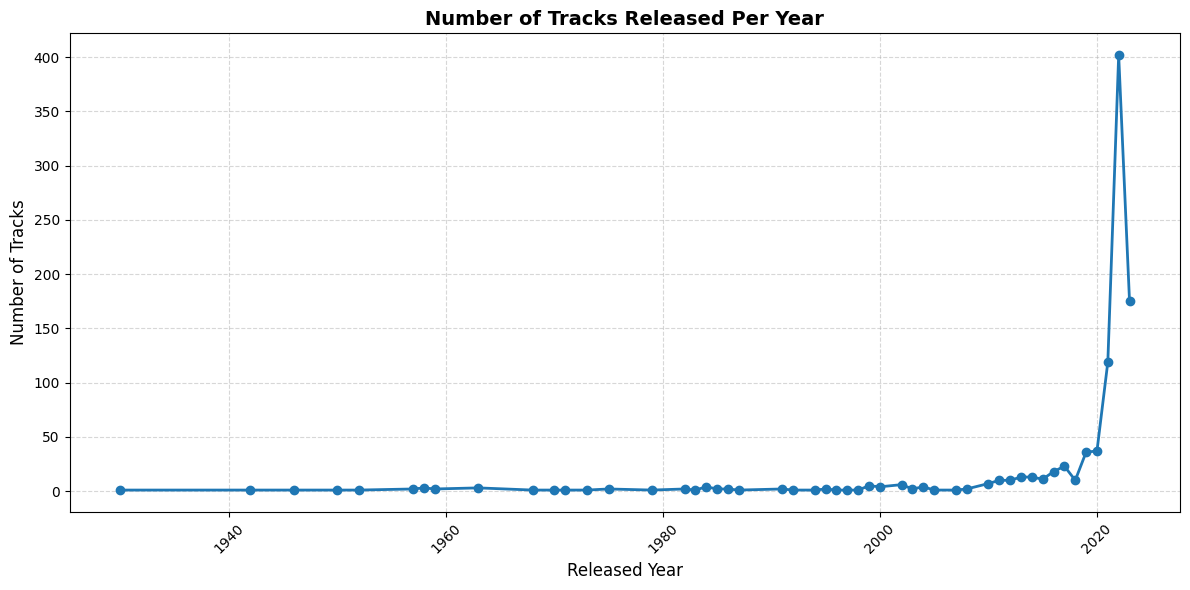

In [33]:
import matplotlib.pyplot as plt

# Count number of tracks released per year
tracks_per_year = spotify_df['released_year'].value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(12,6))
plt.plot(tracks_per_year.index, tracks_per_year.values, marker='o', color='tab:blue', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Released Year', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.title('Number of Tracks Released Per Year', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

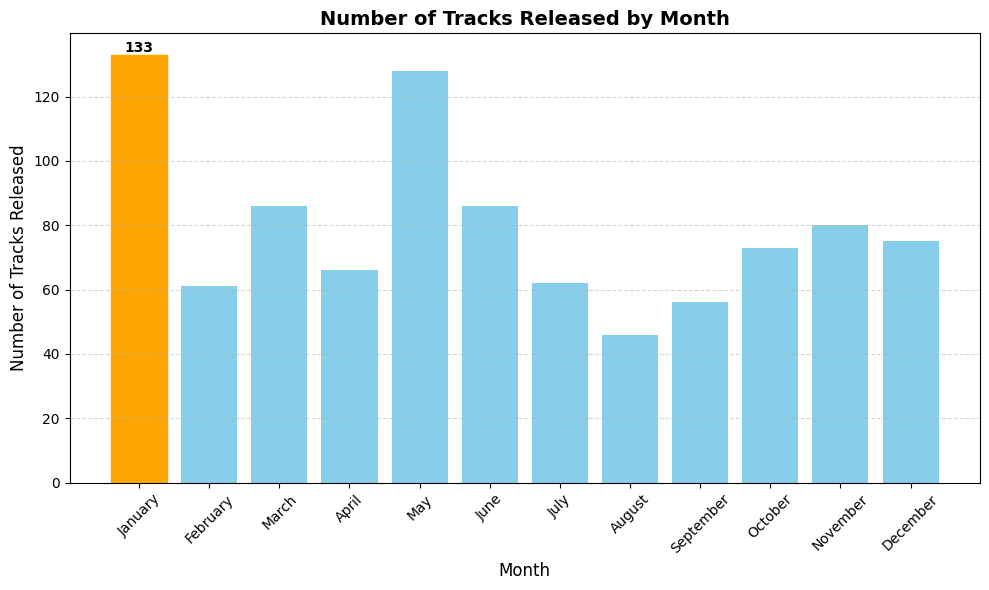

The month with the most releases is January with 133 tracks.
Look at the plot to check for seasonal release trends.


In [35]:
import matplotlib.pyplot as plt
import calendar

# If released_month is stored as month numbers (1–12)
# Otherwise, you can map month names to numbers first
tracks_per_month = spotify_df['released_month'].value_counts().sort_index()

# Map month numbers to names for readability
month_names = [calendar.month_name[m] for m in tracks_per_month.index]
tracks_per_month.index = month_names

# Identify month with highest releases
max_month = tracks_per_month.idxmax()
max_count = tracks_per_month.max()

# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(tracks_per_month.index, tracks_per_month.values, color='skyblue')

# Highlight month with most releases
bars[tracks_per_month.values.argmax()].set_color('orange')

# Labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Tracks Released', fontsize=12)
plt.title('Number of Tracks Released by Month', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate highest bar
plt.text(max_month, max_count, f'{max_count}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print(f"The month with the most releases is {max_month} with {max_count} tracks.")
print("Look at the plot to check for seasonal release trends.")


### Genre and Music Characteristiccs

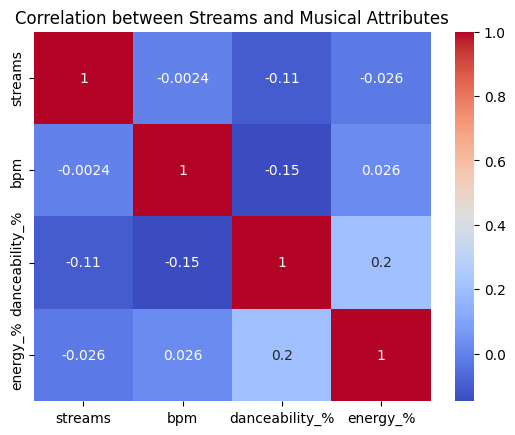

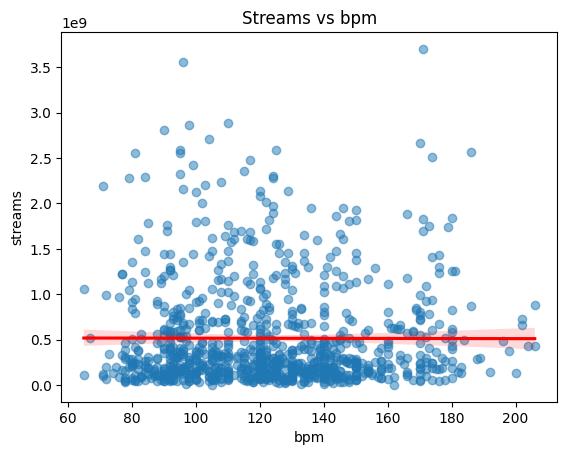

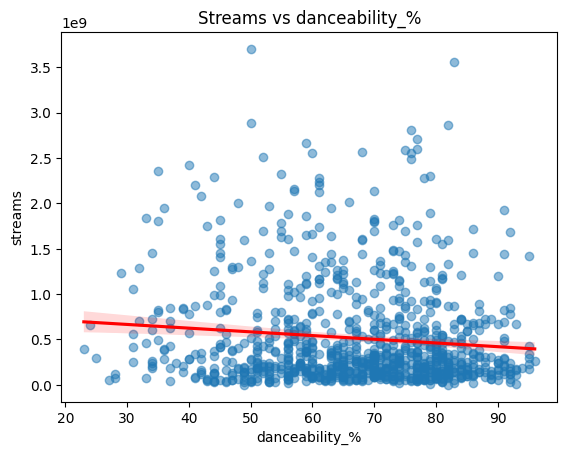

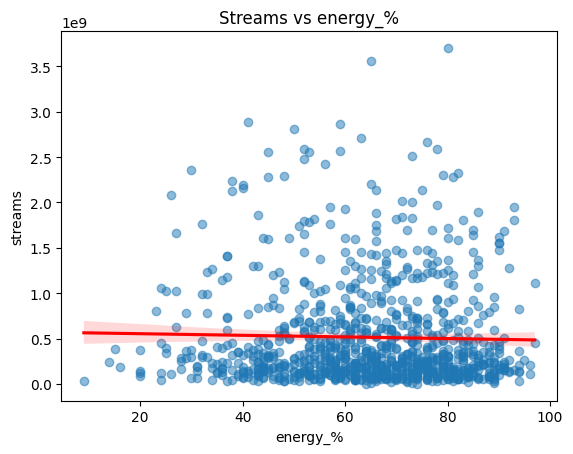

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
numeric_cols = ['streams', 'bpm', 'danceability_%', 'energy_%']
corr = spotify_df[numeric_cols].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Streams and Musical Attributes")
plt.show()

# Scatter plots with regression
for col in ['bpm', 'danceability_%', 'energy_%']:
    sns.regplot(x=col, y='streams', data=spotify_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Streams vs {col}")
    plt.show()


## Analysis of Correlation Between Streams and Musical Attributes

This section examines the relationships between music streams and several musical attributes: **beats per minute (bpm)**, **danceability_%**, and **energy_%**.  
The analysis shows that there is a **very weak or no linear correlation** between these attributes and the number of streams a song receives.

---

### **1. Correlation Heatmap**

The correlation heatmap provides a numerical summary of the relationships.  
Values range from **-1 to 1**:
- **+1** → Strong positive linear correlation
- **-1** → Strong negative linear correlation
- **0** → Weak or no linear correlation

**Key Findings:**
- **Streams vs bpm** → Correlation = **-0.0024**  
  Virtually no linear relationship between a song's BPM and its number of streams.
- **Streams vs danceability_%** → Correlation = **-0.11**  
  Weak negative correlation; as danceability increases, streams tend to slightly decrease, but not strongly.
- **Streams vs energy_%** → Correlation = **-0.026**  
  Negligible linear relationship between a song's energy level and its streams.

---

### **2. Scatter Plots with Regression Lines**

The scatter plots visually confirm the findings from the heatmap:

- **Streams vs bpm**  
  Regression line is almost perfectly horizontal with a slight downward slope.  
  Data points are widely scattered → No clear pattern.
  
- **Streams vs danceability_%**  
  Regression line has a slight downward slope.  
  Large spread in data → Weak negative trend consistent with correlation (-0.11).

- **Streams vs energy_%**  
  Regression line is nearly horizontal with a very slight downward slope.  
  Scattered points → No significant relationship.

---

### **Summary**

The visualizations and correlation values show that:
- A song's **bpm**, **danceability_%**, and **energy_%** are **not strong predictors** of streaming success.
- The number of streams appears to be influenced by **other factors** not included in this analysis.


#### Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

<Axes: title={'center': 'Danceability vs Energy'}, xlabel='energy_%', ylabel='streams'>

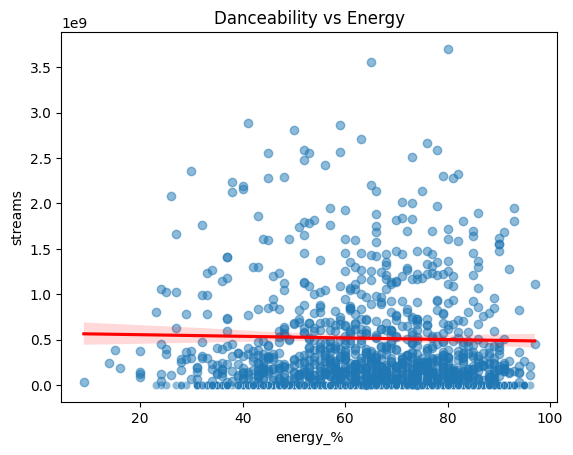

In [43]:
# Correlation between danceability_% and energy_%
sns.scatterplot(x='danceability_%', y='energy_%', data=spotify_df, alpha=0.5)
plt.title("Danceability vs Energy")
sns.regplot(x=col, y='streams', data=spotify_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

<Axes: title={'center': 'Valence vs Acousticness'}, xlabel='energy_%', ylabel='streams'>

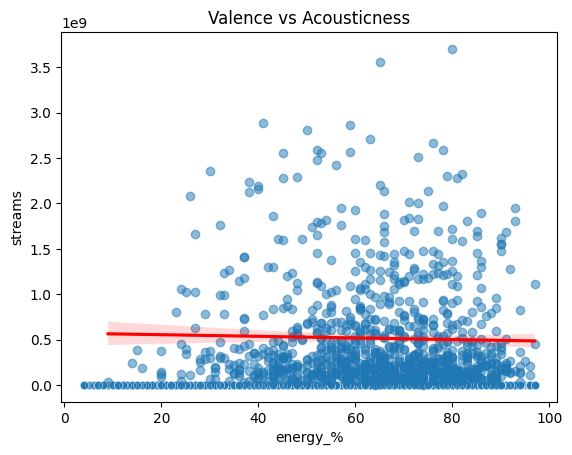

In [ ]:
# Correlation between valence_% and acousticness_%
sns.scatterplot(x='valence_%', y='acousticness_%', data=spotify_df, alpha=0.5)
plt.title("Valence vs Acousticness")
sns.regplot(x=col, y='streams', data=spotify_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

### 6. Platform Popularity

#### How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

### 7. Advanced Analysis

#### Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

C:\Users\Juanito\AppData\Local\Temp\ipykernel_15684\3628945568.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  key_streams_formatted[['mean', 'median', 'sum']] = key_streams_formatted[['mean', 'median', 'sum']].applymap(lambda x: f"{x:,.2f}")
C:\Users\Juanito\AppData\Local\Temp\ipykernel_15684\3628945568.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mode_streams_formatted[['mean', 'median', 'sum']] = mode_streams_formatted[['mean', 'median', 'sum']].applymap(lambda x: f"{x:,.2f}")
C:\Users\Juanito\AppData\Local\Temp\ipykernel_15684\3628945568.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='key', y='mean', data=key_streams, palette='coolwarm')


Streams by Key:

| key   | mean           | median         | sum               |   count |
|-------|----------------|----------------|-------------------|---------|
|       | 521,192,497.47 | 311,482,393.00 | 49,513,287,260.00 |      95 |
| A     | 408,841,411.59 | 241,899,327.50 | 30,254,264,458.00 |      74 |
| A#    | 552,475,435.33 | 363,467,642.00 | 31,491,099,814.00 |      57 |
| B     | 519,347,957.28 | 322,336,177.00 | 42,067,184,540.00 |      81 |
| C#    | 604,280,248.69 | 309,573,860.00 | 72,513,629,843.00 |     120 |
| D     | 529,525,559.20 | 298,063,749.00 | 42,891,570,295.00 |      81 |
| D#    | 553,036,540.15 | 273,194,684.00 | 18,250,205,825.00 |      33 |
| E     | 577,497,189.21 | 284,811,322.50 | 35,804,825,731.00 |      62 |
| F     | 468,446,388.99 | 255,120,451.00 | 41,691,728,620.00 |      89 |
| F#    | 522,363,151.01 | 283,359,161.00 | 38,132,510,024.00 |      73 |
| G     | 452,599,400.97 | 251,810,759.00 | 43,449,542,493.00 |      96 |
| G#    | 476,911,864

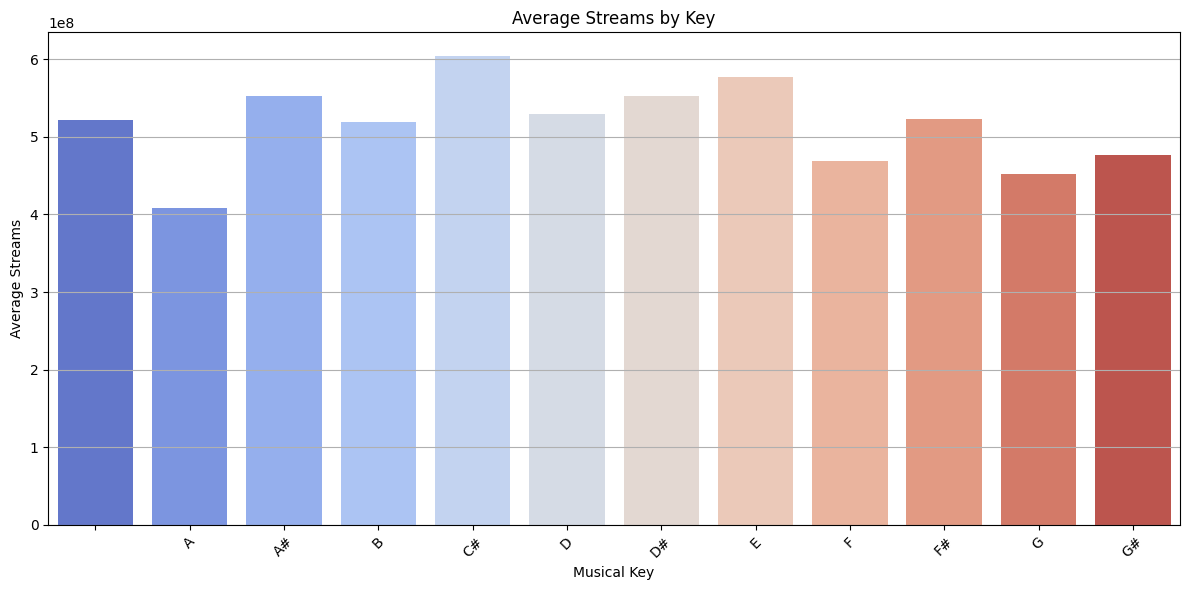

C:\Users\Juanito\AppData\Local\Temp\ipykernel_15684\3628945568.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mode', y='mean', data=mode_streams, palette='pastel')


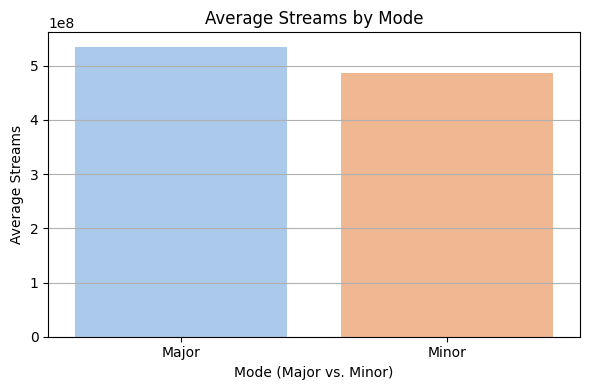

In [59]:
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'key' and calculate total streams
key_streams = spotify_df.groupby('key')['streams'].agg(['mean', 'median', 'sum', 'count']).reset_index()
key_streams[['mean', 'median', 'sum']] = key_streams[['mean', 'median', 'sum']].round(2)

# Group by 'mode' (Major vs. Minor) and calculate total streams
mode_streams = spotify_df.groupby('mode')['streams'].agg(['mean', 'median', 'sum', 'count']).reset_index()
mode_streams[['mean', 'median', 'sum']] = mode_streams[['mean', 'median', 'sum']].round(2)

# Format large numbers with commas
key_streams_formatted = key_streams.copy()
key_streams_formatted[['mean', 'median', 'sum']] = key_streams_formatted[['mean', 'median', 'sum']].applymap(lambda x: f"{x:,.2f}")

mode_streams_formatted = mode_streams.copy()
mode_streams_formatted[['mean', 'median', 'sum']] = mode_streams_formatted[['mean', 'median', 'sum']].applymap(lambda x: f"{x:,.2f}")

# Print the aggregated data for keys and modes in tabulated format
print("Streams by Key:\n")
print(tabulate(key_streams_formatted, headers='keys', tablefmt='github', showindex=False))

print("\nStreams by Mode:\n")
print(tabulate(mode_streams_formatted, headers='keys', tablefmt='github', showindex=False))

# Visualize the patterns by key
plt.figure(figsize=(12, 6))
sns.barplot(x='key', y='mean', data=key_streams, palette='coolwarm')
plt.title('Average Streams by Key')
plt.xlabel('Musical Key')
plt.ylabel('Average Streams')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Visualize the patterns by mode
plt.figure(figsize=(6, 4))
sns.barplot(x='mode', y='mean', data=mode_streams, palette='pastel')
plt.title('Average Streams by Mode')
plt.xlabel('Mode (Major vs. Minor)')
plt.ylabel('Average Streams')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [64]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Aggregate playlist & chart appearances per artist
artist_appearance = (
    spotify_df
    .groupby("artist(s)_name")[["in_spotify_playlists", "in_spotify_charts"]]
    .sum()
    .reset_index()
)

# Sort by playlists or charts to find the top artists
top_artists_playlists = artist_appearance.sort_values("in_spotify_playlists", ascending=False).head(10)
top_artists_charts = artist_appearance.sort_values("in_spotify_charts", ascending=False).head(10)

# Display in neat tables
print("\nTop Artists by Playlist Appearances:\n")
print(tabulate(top_artists_playlists, headers="keys", tablefmt="github", showindex=False))

print("\nTop Artists by Chart Appearances:\n")
print(tabulate(top_artists_charts, headers="keys", tablefmt="github", showindex=False))



Top Artists by Playlist Appearances:

| artist(s)_name      |   in_spotify_playlists |   in_spotify_charts |
|---------------------|------------------------|---------------------|
| The Weeknd          |                 144053 |                 180 |
| Taylor Swift        |                 132974 |                 542 |
| Ed Sheeran          |                 128758 |                  94 |
| Harry Styles        |                 110026 |                 185 |
| Eminem              |                  87331 |                 152 |
| Arctic Monkeys      |                  84016 |                 190 |
| Coldplay            |                  75716 |                  72 |
| Avicii              |                  68241 |                  42 |
| Dr. Dre, Snoop Dogg |                  65728 |                   0 |
| Adele               |                  65049 |                  69 |

Top Artists by Chart Appearances:

| artist(s)_name   |   in_spotify_playlists |   in_spotify_charts |
|----

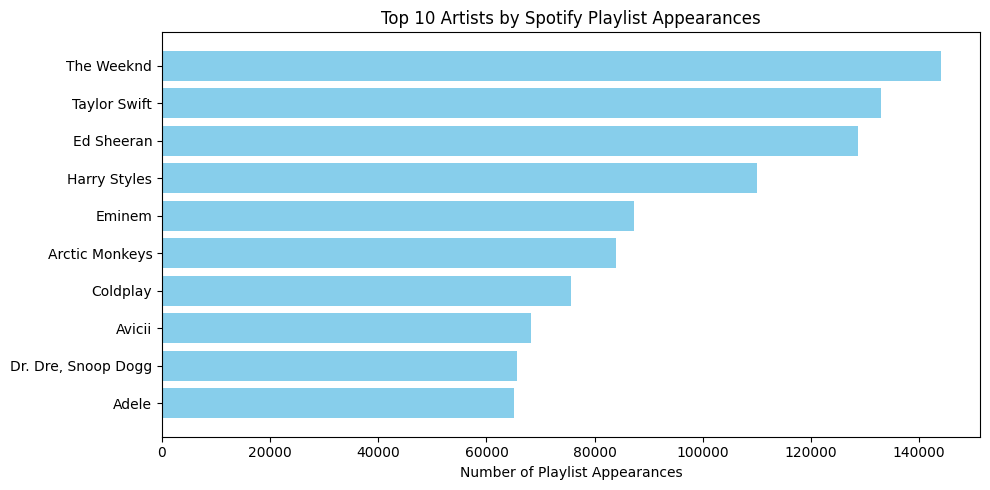

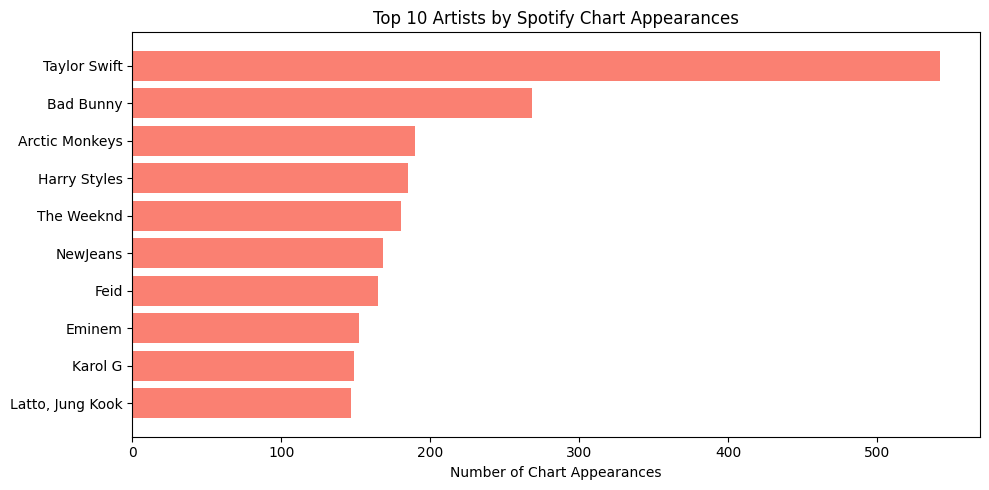

In [65]:
# Bar chart: Top 10 artists by playlist appearances
plt.figure(figsize=(10,5))
plt.barh(top_artists_playlists["artist(s)_name"], top_artists_playlists["in_spotify_playlists"], color="skyblue")
plt.gca().invert_yaxis()  # highest at top
plt.title("Top 10 Artists by Spotify Playlist Appearances")
plt.xlabel("Number of Playlist Appearances")
plt.tight_layout()
plt.show()

# Bar chart: Top 10 artists by chart appearances
plt.figure(figsize=(10,5))
plt.barh(top_artists_charts["artist(s)_name"], top_artists_charts["in_spotify_charts"], color="salmon")
plt.gca().invert_yaxis()
plt.title("Top 10 Artists by Spotify Chart Appearances")
plt.xlabel("Number of Chart Appearances")
plt.tight_layout()
plt.show()
